### НС для задачи классификации

In [1]:
# Tinker With a Neural Network Right Here in Your Browser.
# Don’t Worry, You Can’t Break It. We Promise.
# https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.20330&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# Тут можно поэкспериментировать с нейронными сетями и посмотреть визуализацию

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [3]:
# Загрузка тестового датасета
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
# Метки классов
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

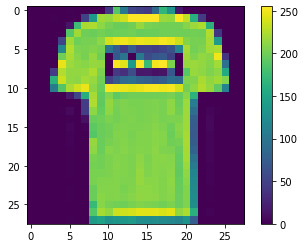

In [8]:
# Отрисовка датасета
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Нормализация значений изображений
train_images = train_images / 255.0
test_images = test_images / 255.0

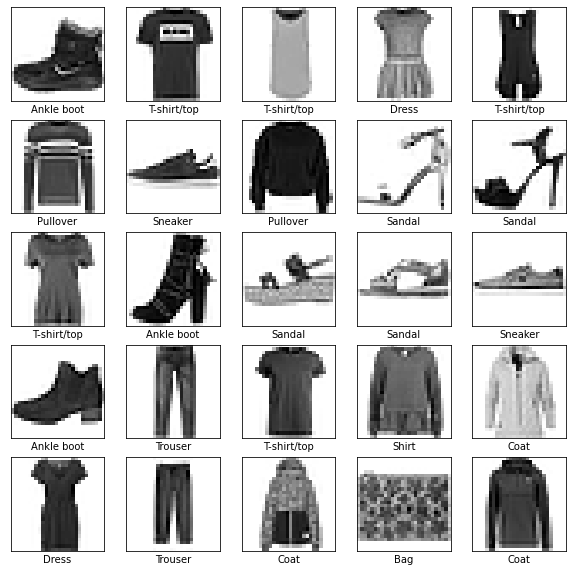

In [10]:
# Визуализация данных
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# Создание нейронной сети
# Передаем список слоев:
# Flatten - преобразование квадратной матрицы в строку
# Dense - слой с активационной функцией relu. На последнем слое - 10 классов
# Каждое изображение 28х28 пикселей - преобразуем в строку
# Слои 128 и 64 - постепенно снижают размерность
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [13]:
# Архитектура модели - Позволяет посчитать кол-во параметров модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Обучение модели
model.fit(train_images, train_labels, epochs = 10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5220 - accuracy: 0.8153 - val_loss: 0.4374 - val_accuracy: 0.8461
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3875 - accuracy: 0.8611 - val_loss: 0.3864 - val_accuracy: 0.8612
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3491 - accuracy: 0.8720 - val_loss: 0.3876 - val_accuracy: 0.8632
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3251 - accuracy: 0.8788 - val_loss: 0.3471 - val_accuracy: 0.8762
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3048 - accuracy: 0.8864 - val_loss: 0.3699 - val_accuracy: 0.8662
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2906 - accuracy: 0.8913 - val_loss: 0.3271 - val_accuracy: 0.8834
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2753 - accuracy: 0.8973 - val_loss: 0.3358 - val_accuracy:

In [19]:
# Оценка точности на тестовой выборке
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)
print(f'Точность на тестовом множестве: {test_acc:.3}')

Точность на тестовом множестве: 0.878


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

313/313 [==============================] - 0s 984us/step - loss: 0.3467 - accuracy: 0.8785


313/313 [==============================] - 0s 704us/step


(array([[0.000e+00, 0.000e+00, 1.000e+00, 9.300e+01, 5.147e+03, 4.181e+03,
         5.640e+02, 1.400e+01, 0.000e+00, 0.000e+00],
        [0.000e+00, 7.000e+00, 1.630e+02, 1.666e+03, 6.058e+03, 1.152e+03,
         2.320e+02, 5.940e+02, 1.280e+02, 0.000e+00],
        [0.000e+00, 0.000e+00, 3.800e+01, 5.130e+02, 4.834e+03, 4.381e+03,
         2.340e+02, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+01, 4.500e+01, 2.600e+02, 9.530e+02, 4.500e+03, 3.820e+03,
         4.120e+02, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 9.000e+00, 2.880e+02, 5.204e+03, 4.121e+03,
         3.780e+02, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 3.400e+01, 5.540e+02, 3.528e+03, 3.079e+03, 1.858e+03,
         5.980e+02, 2.580e+02, 7.500e+01, 1.500e+01],
        [0.000e+00, 0.000e+00, 1.600e+01, 2.040e+02, 3.979e+03, 5.510e+03,
         2.910e+02, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.000e+00, 4.400e+01, 4.900e+02, 4.283e+03, 2.518e+03, 1.903e+03,
         7.580e+02, 0.

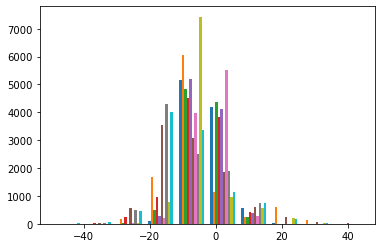

In [21]:
y_pred = model.predict(test_images)
plt.hist(y_pred)

(array([1., 2., 3., 1., 0., 1., 0., 1., 0., 1.]),
 array([-8.594622  , -7.033103  , -5.4715843 , -3.9100654 , -2.3485465 ,
        -0.78702784,  0.77449095,  2.3360097 ,  3.8975284 ,  5.4590473 ,
         7.020566  ], dtype=float32),
 <BarContainer object of 10 artists>)

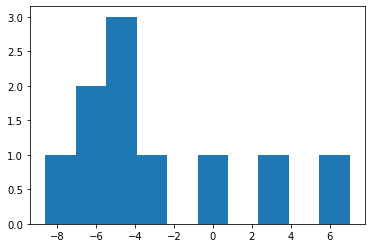

In [22]:
plt.hist(y_pred[0])

In [23]:
# Добавляем еще один слой к модели, теперь на выходе - вероятности
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 733us/step


In [29]:
predictions[0]

array([1.6952739e-05, 1.1792766e-06, 2.3500559e-06, 1.6241185e-07,
       1.1229510e-05, 8.0467557e-04, 4.3505759e-05, 1.6892988e-02,
       9.8536811e-06, 9.8221719e-01], dtype=float32)

In [30]:
np.round(predications[0], 2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
      dtype=float32)

In [31]:
# Получаем индекс
np.argmax(predications[0])

9

In [32]:
class_names[np.argmax(predications[0])]

'Ankle boot'

(array([[8.558e+03, 1.210e+02, 9.500e+01, 1.120e+02, 1.000e+02, 8.000e+01,
         7.900e+01, 8.900e+01, 1.090e+02, 6.570e+02],
        [8.944e+03, 3.500e+01, 9.000e+00, 1.200e+01, 9.000e+00, 6.000e+00,
         4.000e+00, 5.000e+00, 1.300e+01, 9.630e+02],
        [8.434e+03, 2.290e+02, 1.770e+02, 1.300e+02, 1.060e+02, 9.900e+01,
         7.400e+01, 1.050e+02, 1.360e+02, 5.100e+02],
        [8.613e+03, 1.450e+02, 8.000e+01, 6.300e+01, 7.400e+01, 6.200e+01,
         5.600e+01, 6.700e+01, 8.800e+01, 7.520e+02],
        [8.306e+03, 2.360e+02, 1.410e+02, 1.210e+02, 8.900e+01, 1.020e+02,
         1.070e+02, 1.290e+02, 1.920e+02, 5.770e+02],
        [8.951e+03, 2.100e+01, 2.100e+01, 1.500e+01, 8.000e+00, 6.000e+00,
         9.000e+00, 6.000e+00, 2.000e+01, 9.430e+02],
        [8.477e+03, 3.770e+02, 2.450e+02, 1.810e+02, 1.270e+02, 1.150e+02,
         8.500e+01, 6.500e+01, 7.700e+01, 2.510e+02],
        [8.878e+03, 4.500e+01, 9.000e+00, 1.500e+01, 1.300e+01, 2.300e+01,
         2.300e+01, 4.

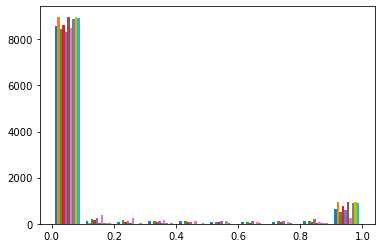

In [33]:
plt.hist(predictions)

In [34]:
print(f'Сколько раз мы угадали: {np.sum(predictions.argmax(axis=1) == test_labels)}')

Сколько раз мы угадали: 8785


In [38]:
# Расчет точности в ручную
np.sum(predictions.argmax(axis=1) == test_labels) / test_labels.shape[0]

0.8785

In [40]:
img = test_images[3000].copy()
print(img.shape)

(28, 28)


In [43]:
img_prediction = probability_model.predict(img)

1/1 [==============================] - 0s 15ms/step


In [44]:
np.round(img_prediction, 2)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)